In [75]:
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import smote_variants as sv
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression


2022-05-22 20:35:56,026:DEBUG:Loaded backend module://matplotlib_inline.backend_inline version unknown.


In [76]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import metrics

Load the Data

In [77]:
#clinical = pd.read_csv('/Users/madhuri/Desktop/MasterThesis/Part2/ClinicalDF1.csv')

In [78]:
#gene_data = pd.read_csv('/Users/madhuri/Desktop/MasterThesis/Part2/final_gene_list.csv')

In [79]:
#gene_data.head()

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing


In [81]:
import os
file_list=[]
#path_of_the_directory = '/storage/home/mpg5798/work/Non LandmarkGenes'
for files in os.listdir():
    if ((files.startswith('nlm')) | (files.startswith('lm'))&(files.endswith('.csv'))):
        file_list.append(files)
print(file_list)
len(file_list)

['nlm_c1_14.csv', 'nlm_c3_11.csv', 'nlm_c3_10.csv', 'nlm_c3_12.csv', 'nlm_c3_13.csv', 'nlm_c1_12.csv', 'nlm_c3_9.csv', 'nlm_c3_8.csv', 'nlm_c1_13.csv', 'nlm_c1_11.csv', 'nlm_c3_14.csv', 'nlm_c1_8.csv', 'nlm_c1_9.csv', 'nlm_c1_10.csv', 'nlm_c4_9.csv', 'nlm_c4_8.csv', 'nlm_c2_9.csv', 'nlm_c2_8.csv', 'nlm_c2_13.csv', 'nlm_c2_5.csv', 'nlm_c4_3.csv', 'nlm_c4_2.csv', 'nlm_c2_4.csv', 'nlm_c2_12.csv', 'nlm_c2_10.csv', 'nlm_c2_6.csv', 'nlm_c4_0.csv', 'nlm_c4_1.csv', 'nlm_c2_7.csv', 'nlm_c2_11.csv', 'nlm_c2_3.csv', 'nlm_c4_5.csv', 'nlm_c4_4.csv', 'nlm_c2_2.csv', 'nlm_c2_14.csv', 'nlm_c2_0.csv', 'nlm_c4_6.csv', 'nlm_c4_7.csv', 'nlm_c2_1.csv', 'nlm_c4_11.csv', 'nlm_c3_6.csv', 'nlm_c1_4.csv', 'nlm_c1_5.csv', 'nlm_c4_10.csv', 'nlm_c3_7.csv', 'nlm_c3_5.csv', 'nlm_c4_12.csv', 'nlm_c1_7.csv', 'nlm_c1_6.csv', 'nlm_c3_4.csv', 'nlm_c4_13.csv', 'nlm_c3_0.csv', 'nlm_c1_2.csv', 'nlm_c1_3.csv', 'nlm_c3_1.csv', 'nlm_c3_3.csv', 'nlm_c4_14.csv', 'nlm_c1_1.csv', 'nlm_c1_0.csv', 'nlm_c3_2.csv']


60

In [82]:
#nlm_c3_12.csv

The next step is to find out number of components with eigenvalues>1, for each set of genes

In [83]:
number_of_components=[]
clus_size=[]
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    plt.text(25, 0.85, "Components needed: "+str(np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9)[0][0]), 
             color = "red", fontsize=16)
    show()

#scree_plot()
for i in range(60):
    dataframe= pd.read_csv(file_list[i])
    clus_size.append(len(dataframe.columns))
    #dataframe['CancerType']=clinical['CancerType']
    X= dataframe
    #y=dataframe['CancerType']
    #X_train,X_test_unscaled,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=30) 
    #le = LabelEncoder()
    #le.fit(y_train)
    #y_train_enc= le.transform(y_train)
    #y_test_enc=le.transform(y_test)
    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    #X_test=scaler.transform(X_test_unscaled)
    pca = PCA(random_state=10)
    pca_data = pd.DataFrame(pca.fit_transform(X_scaled))
    #pca_data.to_csv("PC_Set_" +str(i+1)+".csv")
    #print("********", file_list[i])
    #scree_plot()
    number_pcs=np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9)[0][0]
    number_of_components.append(number_pcs)
    #print(pca.explained_variance_ratio_) #explained variance for each component
    #print("cluster_", file_list[i])
    #components.append(pca.n_components_)
    #print(file_list[i], components[i])
    tot = sum(pca.explained_variance_)
    #var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
    #print(pca.components_) #eigen vectors
    #print(pca.explained_variance_) #eigen values
    #print(pow((pca.components_.T),2)) #variable contribution
    #pca.components_

        #print(var_exp[0:9])
        # Cumulative explained variance
        #cum_var_exp = np.cumsum(var_exp) 
        #print("************************************")
    # PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
# plt.figure(figsize=(10, 5))
# plt.step(range(1, (pca.n_components_+1)), cum_var_exp, where='mid',label='cumulative explained variance')
# plt.title('Cumulative Explained Variance as a Function of the Number of Components')
# plt.ylabel('Cumulative Explained variance')
# plt.xlabel('Principal components')
# plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
# plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
# plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
# plt.legend(loc='best')
# plt.show()

print("done************")


done************


In [68]:
# # Scree plot
# plt.figure(figsize=(15, 6))
# components = np.arange(1, 978, step=50)
# eigenvalues = pca.explained_variance_
# plt.plot(components, eigenvalues, marker = 'o', 
#                  linestyle = '--', color = 'green')
# plt.ylim(0, max(eigenvalues))
# plt.ylabel('Eigenvalue')
# plt.xlabel('Number of Components')
# plt.xticks(np.arange(1, 85, step = 2))
# plt.title('Scree plot')
# plt.axhline(y=1, color = 'r', linestyle = '-')
# plt.text(0, 0.75, 'Eigenvalue Cutoff', color = 'red', fontsize=14)
# plt.text(15, 1.10, 'Components Needed: '+str(np.where(eigenvalues<=1)[0][0]), 
#                  color = 'red', fontsize=14)
# plt.show()

In [84]:
len(number_of_components)


60

In [85]:
pca_sizes=pd.DataFrame({'cluster_name':file_list,'number_predictors':clus_size, 'number of pcas':number_of_components})

In [86]:
pca_sizes

,cluster_name,number_predictors,number of pcas
0,nlm_c1_14.csv,483,318
1,nlm_c3_11.csv,170,70
2,nlm_c3_10.csv,39,19
3,nlm_c3_12.csv,278,131
4,nlm_c3_13.csv,42,18
5,nlm_c1_12.csv,516,323
6,nlm_c3_9.csv,457,297
7,nlm_c3_8.csv,55,24
8,nlm_c1_13.csv,170,67
9,nlm_c1_11.csv,66,30


In [99]:
file_list

['nlm_c1_14.csv',
 'nlm_c3_11.csv',
 'nlm_c3_10.csv',
 'nlm_c3_12.csv',
 'nlm_c3_13.csv',
 'nlm_c1_12.csv',
 'nlm_c3_9.csv',
 'nlm_c3_8.csv',
 'nlm_c1_13.csv',
 'nlm_c1_11.csv',
 'nlm_c3_14.csv',
 'nlm_c1_8.csv',
 'nlm_c1_9.csv',
 'nlm_c1_10.csv',
 'nlm_c4_9.csv',
 'nlm_c4_8.csv',
 'nlm_c2_9.csv',
 'nlm_c2_8.csv',
 'nlm_c2_13.csv',
 'nlm_c2_5.csv',
 'nlm_c4_3.csv',
 'nlm_c4_2.csv',
 'nlm_c2_4.csv',
 'nlm_c2_12.csv',
 'nlm_c2_10.csv',
 'nlm_c2_6.csv',
 'nlm_c4_0.csv',
 'nlm_c4_1.csv',
 'nlm_c2_7.csv',
 'nlm_c2_11.csv',
 'nlm_c2_3.csv',
 'nlm_c4_5.csv',
 'nlm_c4_4.csv',
 'nlm_c2_2.csv',
 'nlm_c2_14.csv',
 'nlm_c2_0.csv',
 'nlm_c4_6.csv',
 'nlm_c4_7.csv',
 'nlm_c2_1.csv',
 'nlm_c4_11.csv',
 'nlm_c3_6.csv',
 'nlm_c1_4.csv',
 'nlm_c1_5.csv',
 'nlm_c4_10.csv',
 'nlm_c3_7.csv',
 'nlm_c3_5.csv',
 'nlm_c4_12.csv',
 'nlm_c1_7.csv',
 'nlm_c1_6.csv',
 'nlm_c3_4.csv',
 'nlm_c4_13.csv',
 'nlm_c3_0.csv',
 'nlm_c1_2.csv',
 'nlm_c1_3.csv',
 'nlm_c3_1.csv',
 'nlm_c3_3.csv',
 'nlm_c4_14.csv',
 'nlm_c1_1.

In [87]:
pca_sizes.to_csv("number_of_PCs_for_60_NLM_clusters_as_predictors.csv", index=False)

The next step is to perform pca with N-components found in prev step and save pcs in csv files

In [88]:
for i in range(60):
    j=number_of_components
    (print(j))
    dataframe= pd.read_csv(file_list[i])
    #clus_size.append(len(dataframe.columns))
    #dataframe['CancerType']=clinical['CancerType']
    X= dataframe
    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    #X_test=scaler.transform(X_test_unscaled)
    print(j[i])
    pca = PCA(n_components=j[i],random_state=10)
    pca_data = pd.DataFrame(pca.fit_transform(X_scaled))
    print(pca_data.shape)
    pca_data.to_csv("PC_NLM_Set_" +file_list[i] + str(i+1)+".csv", index=False)

[318, 70, 19, 131, 18, 323, 297, 24, 67, 30, 123, 309, 139, 320, 68, 75, 26, 133, 332, 24, 66, 71, 304, 59, 143, 32, 130, 133, 295, 316, 141, 59, 23, 25, 72, 75, 129, 25, 58, 123, 71, 56, 318, 61, 138, 136, 22, 74, 308, 139, 128, 25, 131, 312, 25, 23, 31, 323, 314, 303]
318
(6802, 318)
[318, 70, 19, 131, 18, 323, 297, 24, 67, 30, 123, 309, 139, 320, 68, 75, 26, 133, 332, 24, 66, 71, 304, 59, 143, 32, 130, 133, 295, 316, 141, 59, 23, 25, 72, 75, 129, 25, 58, 123, 71, 56, 318, 61, 138, 136, 22, 74, 308, 139, 128, 25, 131, 312, 25, 23, 31, 323, 314, 303]
70
(6802, 70)
[318, 70, 19, 131, 18, 323, 297, 24, 67, 30, 123, 309, 139, 320, 68, 75, 26, 133, 332, 24, 66, 71, 304, 59, 143, 32, 130, 133, 295, 316, 141, 59, 23, 25, 72, 75, 129, 25, 58, 123, 71, 56, 318, 61, 138, 136, 22, 74, 308, 139, 128, 25, 131, 312, 25, 23, 31, 323, 314, 303]
19
(6802, 19)
[318, 70, 19, 131, 18, 323, 297, 24, 67, 30, 123, 309, 139, 320, 68, 75, 26, 133, 332, 24, 66, 71, 304, 59, 143, 32, 130, 133, 295, 316, 141, 5

(6802, 295)
[318, 70, 19, 131, 18, 323, 297, 24, 67, 30, 123, 309, 139, 320, 68, 75, 26, 133, 332, 24, 66, 71, 304, 59, 143, 32, 130, 133, 295, 316, 141, 59, 23, 25, 72, 75, 129, 25, 58, 123, 71, 56, 318, 61, 138, 136, 22, 74, 308, 139, 128, 25, 131, 312, 25, 23, 31, 323, 314, 303]
316
(6802, 316)
[318, 70, 19, 131, 18, 323, 297, 24, 67, 30, 123, 309, 139, 320, 68, 75, 26, 133, 332, 24, 66, 71, 304, 59, 143, 32, 130, 133, 295, 316, 141, 59, 23, 25, 72, 75, 129, 25, 58, 123, 71, 56, 318, 61, 138, 136, 22, 74, 308, 139, 128, 25, 131, 312, 25, 23, 31, 323, 314, 303]
141
(6802, 141)
[318, 70, 19, 131, 18, 323, 297, 24, 67, 30, 123, 309, 139, 320, 68, 75, 26, 133, 332, 24, 66, 71, 304, 59, 143, 32, 130, 133, 295, 316, 141, 59, 23, 25, 72, 75, 129, 25, 58, 123, 71, 56, 318, 61, 138, 136, 22, 74, 308, 139, 128, 25, 131, 312, 25, 23, 31, 323, 314, 303]
59
(6802, 59)
[318, 70, 19, 131, 18, 323, 297, 24, 67, 30, 123, 309, 139, 320, 68, 75, 26, 133, 332, 24, 66, 71, 304, 59, 143, 32, 130, 133, 29

323
(6802, 323)
[318, 70, 19, 131, 18, 323, 297, 24, 67, 30, 123, 309, 139, 320, 68, 75, 26, 133, 332, 24, 66, 71, 304, 59, 143, 32, 130, 133, 295, 316, 141, 59, 23, 25, 72, 75, 129, 25, 58, 123, 71, 56, 318, 61, 138, 136, 22, 74, 308, 139, 128, 25, 131, 312, 25, 23, 31, 323, 314, 303]
314
(6802, 314)
[318, 70, 19, 131, 18, 323, 297, 24, 67, 30, 123, 309, 139, 320, 68, 75, 26, 133, 332, 24, 66, 71, 304, 59, 143, 32, 130, 133, 295, 316, 141, 59, 23, 25, 72, 75, 129, 25, 58, 123, 71, 56, 318, 61, 138, 136, 22, 74, 308, 139, 128, 25, 131, 312, 25, 23, 31, 323, 314, 303]
303
(6802, 303)


In [89]:
import os
import pandas as pd
pca_file_list=[]
#path_of_the_directory = '/storage/home/mpg5798/work/Non LandmarkGenes'
for files in os.listdir():
    if ((files.startswith('PC_'))):
        
        pca_file_list.append(files)
   
for i in range(60):
    df=pd.read_csv(pca_file_list[i])
    print(pca_file_list[i])
        #df=pd.read_csv('files')
        
    print(df.shape)


PC_NLM_Set_nlm_c1_1.csv58.csv
(6802, 323)
PC_NLM_Set_nlm_c1_4.csv42.csv
(6802, 56)
PC_NLM_Set_nlm_c4_5.csv32.csv
(6802, 59)
PC_NLM_Set_nlm_c1_7.csv48.csv
(6802, 74)
PC_Set_58.csv
(6802, 312)
PC_Set_64.csv
(6802, 303)
PC_NLM_Set_nlm_c2_2.csv34.csv
(6802, 25)
PC_NLM_Set_nlm_c4_3.csv21.csv
(6802, 66)
PC_NLM_Set_nlm_c1_10.csv14.csv
(6802, 320)
PC_NLM_Set_nlm_c1_2.csv53.csv
(6802, 131)
PC_Set_59.csv
(6802, 25)
PC_NLM_Set_nlm_c3_10.csv3.csv
(6802, 19)
PC_Set_61.csv
(6802, 31)
PC_Set_49.csv
(6802, 138)
PC_NLM_Set_nlm_c2_1.csv39.csv
(6802, 58)
PC_NLM_Set_nlm_c2_10.csv25.csv
(6802, 143)
PC_NLM_Set_nlm_c3_7.csv45.csv
(6802, 138)
PC_NLM_Set_nlm_c1_14.csv1.csv
(6802, 318)
PC_NLM_Set_nlm_c4_11.csv40.csv
(6802, 123)
PC_Set_48.csv
(6802, 61)
PC_Set_60.csv
(6802, 23)
PC_NLM_Set_nlm_c3_11.csv2.csv
(6802, 70)
PC_NLM_Set_nlm_c2_4.csv23.csv
(6802, 304)
PC_NLM_Set_nlm_c3_2.csv60.csv
(6802, 303)
PC_Set_62.csv
(6802, 323)
PC_NLM_Set_nlm_c2_7.csv29.csv
(6802, 295)
PC_Set_63.csv
(6802, 314)
PC_NLM_Set_nlm_c3_1

#### The steps that follow read clinical data, take 3 variables(Morphology, Age, Gender) and concatenate with prinicpal components of cluster genes from each set, then perform SMOTE and MLR and measure accuracy

In [90]:
clinical = pd.read_csv('/Users/madhuri/Desktop/MasterThesis/Part2/ClinicalDF1.csv')

In [91]:
clinical_three=clinical[['Morphology', 'AgeAtDiagnosis', 'Gender', 'CancerType']]

In [92]:
clinical_three.head()


,Morphology,AgeAtDiagnosis,Gender,CancerType
0,8120/3,27730.0,male,Bladder
1,8120/3,28106.0,male,Bladder
2,8120/3,26546.0,male,Bladder
3,8120/3,20424.0,male,Bladder
4,8120/3,25317.0,male,Bladder


In [93]:
clinical_three.isna().sum()

Morphology        28
AgeAtDiagnosis    84
Gender            28
CancerType         0
dtype: int64

In [95]:
accuracies=[]
for i in range(60):
    df=pd.read_csv(pca_file_list[i])
    pc_clinical=pd.concat([df, clinical_three], axis=1)
    #print(pc_clinical.head())
    #print(pc_clinical.shape)
    pc_clinical=pc_clinical.dropna()
    #print(pc_clinical.shape)
    #print(pc_clinical['CancerType'].value_counts())
    X= pc_clinical.iloc[:, :-1]
    y=pc_clinical['CancerType']
    X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=10) 
    numerical_ix= X.select_dtypes(include=['int64','float64']).columns
    categorical_ix = X.select_dtypes(include=['object', 'bool']).columns
    #one hot encoding categorical predictors
    t=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
    col_transform=ColumnTransformer(transformers=t)
    X_transform=col_transform.fit_transform(X_train)
    X_test=col_transform.transform(X_test)
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc= le.transform(y_train)
    y_test_enc=le.transform(y_test)
    # Define SMOTE-Tomek Links
    resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
    X_samp, y_samp = resample.fit_resample(X_transform, y_train_enc)
    # define the multinomial logistic regression model
    model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter = 1000)
    # define the model evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)  
    # evaluate the model and collect the scores
    n_scores = cross_val_score(model, X_samp, y_samp, scoring='accuracy', cv=cv, n_jobs=-1)
    #  model performance
    #print('Mean Accuracy: %.3f' % (mean(n_scores)))
    model.fit(X_samp,y_samp)
    y_pred=model.predict(X_test)
    print("##########TEST ACCURACY:")
    acc=round((metrics.accuracy_score(y_test_enc,y_pred)*100), 3)
    accuracies.append(acc)
    print(acc)

##########TEST ACCURACY:
94.395
##########TEST ACCURACY:
96.726
##########TEST ACCURACY:
96.825
##########TEST ACCURACY:
96.528
##########TEST ACCURACY:
95.139
##########TEST ACCURACY:
94.494
##########TEST ACCURACY:
93.948
##########TEST ACCURACY:
96.131
##########TEST ACCURACY:
94.593
##########TEST ACCURACY:
96.28
##########TEST ACCURACY:
94.296
##########TEST ACCURACY:
94.246
##########TEST ACCURACY:
94.444
##########TEST ACCURACY:
96.478
##########TEST ACCURACY:
95.833
##########TEST ACCURACY:
96.429
##########TEST ACCURACY:
96.429
##########TEST ACCURACY:
94.94
##########TEST ACCURACY:
96.379
##########TEST ACCURACY:
95.784
##########TEST ACCURACY:
93.651
##########TEST ACCURACY:
96.181
##########TEST ACCURACY:
94.544
##########TEST ACCURACY:
94.544
##########TEST ACCURACY:
94.345
##########TEST ACCURACY:
94.692
##########TEST ACCURACY:
93.899
##########TEST ACCURACY:
94.196
##########TEST ACCURACY:
96.776
##########TEST ACCURACY:
94.296
##########TEST ACCURACY:
93.998
##########

In [97]:
len(accuracies)

60

In [15]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc= le.transform(y_train)
y_test_enc=le.transform(y_test)

In [16]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test=scaler.transform(X_test_unscaled)

Make an instance of PCA

In [17]:
pca = PCA(.95)

Reduce the dimensionality of your data

In [18]:
lower_dimensional_data = pca.fit_transform(X_scaled)

In [19]:
pca.n_components_

2462

The idea with going from 784 components to 154 is to reduce the running time of a supervised learning algorithm (in this case logistic regression) which we will see at the end of the tutorial. One of the cool things about PCA is that we can go from a compressed representation (154 components) back to an approximation of the original high dimensional data (784 components). 

In [20]:
approximation = pca.inverse_transform(lower_dimensional_data)

In [21]:
# Summing explained variance
tot = sum(pca.explained_variance_)
tot

19004.1085427634

In [22]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[13.303043248398374, 8.93914474127685, 6.99476834140515, 5.268914400666945, 3.160974282303665]


In [23]:
tot = sum(pca.explained_variance_)
tot

19004.1085427634

In [24]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[13.303043248398374, 8.93914474127685, 6.99476834140515, 5.268914400666945, 3.160974282303665]


In [25]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp) 

Plot can help you understand the level of redundancy present in multiple dimensions.

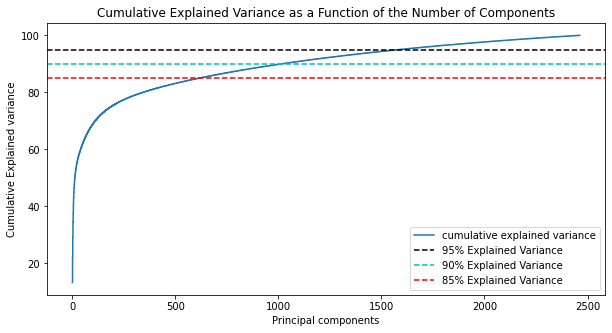

In [28]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 2463), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

## Number of Principal Components for 99%, 95%, 90%, and 85% of Explained Variance

In [29]:
# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [2462, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]

In [30]:
componentsVariance

[2462, 2248, 1585, 1016, 617]